In [ ]:
# Nama Anggota Kelompok :

# - Yulia Pratiwi (G1A021029)
# - Zabrila Amrina Zadia Putri (G1A021053)

In [2]:
#MENAMBAHKAN DATASET
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
#MENAMBAHKAN DATASET
df = pd.read_csv("https://raw.githubusercontent.com/yuliapratiwi169/Statistika_Dataset_G1A021029_G1A021053/main/shopping_data_missingvalue.csv")
df

,CustomerID,Genre,Age,Income,Spending Score
0,1,Male,19.0,15,39
1,2,Male,NaN,15,81
2,3,Female,20.0,15,6
3,4,Female,NaN,16,21
4,5,Female,121.0,17,81
5,6,Female,22.0,17,76
6,7,Female,35.0,18,6
7,8,Female,23.0,18,94
8,9,Male,44.0,19,33
9,10,Female,30.0,19,72


In [24]:
#MENGIDENTIFIKASI MISSING VALUE YANG ADA PADA DATA
df.isnull().sum()

CustomerID         0
Genre              0
Age                3
Income             0
Spending Score     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


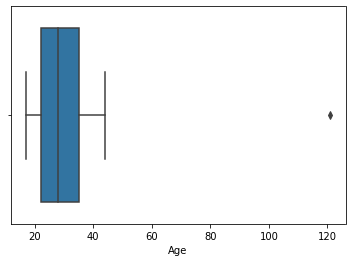

In [25]:
#BOXPLOT

import seaborn as sns
sns.boxplot(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


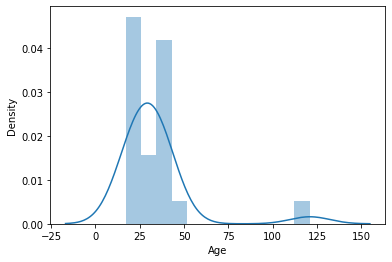

In [45]:
#DISTRIBUTUION PLOT

sns.distplot(df.Age)

In [27]:
#MODE DARI AGE
df.Age.mode()

0    35.0
dtype: float64

In [28]:
#MENGGANTI NILAI PADA AGE YG HILANG MENGGUNAKAN MODE
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df

,CustomerID,Genre,Age,Income,Spending Score
0,1,Male,19.0,15,39
1,2,Male,35.0,15,81
2,3,Female,20.0,15,6
3,4,Female,35.0,16,21
4,5,Female,121.0,17,81
5,6,Female,22.0,17,76
6,7,Female,35.0,18,6
7,8,Female,23.0,18,94
8,9,Male,44.0,19,33
9,10,Female,30.0,19,72


In [29]:
#SETELAH MISSING VALUE AGE DIGANTI DENGAN MODE
df.isnull().sum()

CustomerID         0
Genre              0
Age                0
Income             0
Spending Score     0
dtype: int64

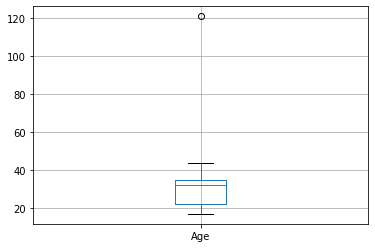

In [30]:
#MENDETEKSI OUTLIER MENGGUNAKAN BOXPLOT
df.boxplot("Age")

In [32]:
df.describe()

,CustomerID,Age,Income,Spending Score
count,22.000000,22.000000,22.000000,22.000000
mean,11.500000,33.318182,19.227273,48.227273
std,6.493587,20.965701,2.759086,30.199230
min,1.000000,17.000000,15.000000,6.000000
25%,6.250000,22.250000,17.250000,23.000000
50%,11.500000,32.000000,19.000000,42.000000
75%,16.750000,35.000000,20.750000,76.750000
max,22.000000,121.000000,24.000000,99.000000


In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID         10.50
Age                12.75
Income              3.50
Spending Score     53.75
dtype: float64


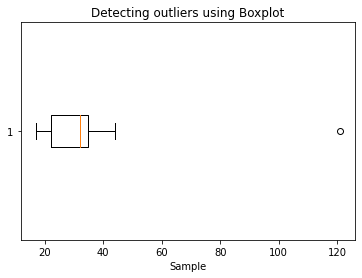

In [35]:
#Mendeteksi outlier menggunakan Bloxpot

sample= [19, 35, 20, 35, 121, 22, 35, 23, 44, 30, 37, 35, 28, 24, 37, 22, 35, 20, 35, 34, 25, 17]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [36]:
# Mendeteksi Outlier meggunakan Z-scores
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [121]


In [37]:
# Mendeteksi Outlier menggunakan the Inter Quantile Range(IQR)
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [121]


In [38]:
# Trimming outliers
# Trimming
for i in sample_outliers:
    a = np.delete(sample, np.where(sample==i))
print(a)
# print(len(sample), len(a))

[ 19  35  20  35 121  22  35  23  44  30  37  35  28  24  37  22  35  20
  35  34  25  17]


In [39]:
#Remove Outlier
sample= [19, 35, 20, 35, 121, 22, 35, 23, 44, 30, 37, 35, 28, 24, 37, 22, 35, 20, 35, 34, 25, 17]
for i in sample_outliers:  
      a=sample 
      a.remove (i)
print(a)

[19, 35, 20, 35, 22, 35, 23, 44, 30, 37, 35, 28, 24, 37, 22, 35, 20, 35, 34, 25, 17]


In [40]:
# Quantile based flooring and capping
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile) 
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

20.0 37.0
New array: [20. 35. 20. 35. 22. 35. 23. 37. 30. 37. 35. 28. 24. 37. 22. 35. 20. 35.
 34. 25. 20.]


In [41]:
# Mean/Median imputation

median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)


Sample:  [19, 35, 20, 35, 22, 35, 23, 44, 30, 37, 35, 28, 24, 37, 22, 35, 20, 35, 34, 25, 17]
New array:  [19 35 20 35 22 35 23 44 30 37 35 28 24 37 22 35 20 35 34 25 17]


Text(0.5, 0, 'Sample')

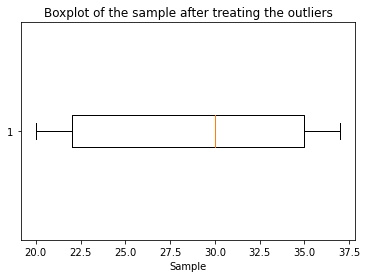

In [42]:
# Tampilan setelah tidak ada missing value dan outlier
plt.boxplot(b, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

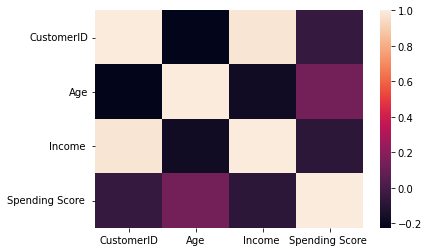

In [43]:
#Menampilkan Heatmap

sns.heatmap(df.corr())
plt.show()